In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

plt.rcParams['figure.figsize'] = 12, 6
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

In [3]:
moisture = np.linspace(0,1,10**4)

T_d = 290 # K 
F = 227 # W

T_d_std = 3
F_std = 40

alpha_s=4
alpha_r=8
nu   =0.03
mu   =40
V    =5
m0   =0.1

L    =2.5E6

N_samples = 10**4
F_dist = np.random.normal(F, F_std, N_samples)
T_d_dist = np.random.normal(T_d, T_d_std, N_samples)

P_surf = 101325 # Pa
R_w = 461.52 #J/kg
T_0 = 273.15 # K

prefactor_model = 0.622 * L * (P_surf * R_w * T_d**2)**(-1) * 611
exp_term_model = np.exp(L * R_w**(-1) * (T_0**(-1) - T_d**(-1) ))
gamma = prefactor_model * exp_term_model

prefactor_dist = 0.622 * L * (P_surf * R_w * T_d_dist**2)**(-1) * 611
exp_term_dist = np.exp(L * R_w**(-1) * (T_0**(-1) - T_d_dist**(-1) ))

gamma_dist = prefactor_dist * exp_term_dist

In [4]:
T_null_mean = T_d + F * (alpha_s + alpha_r + nu * m0 * L * gamma  + L * gamma * nu * moisture)**(-1)

T_null_quadm0 = T_d + F * (alpha_s + alpha_r + nu * 4 * m0 * L * gamma  + L * gamma * nu * moisture)**(-1)
T_null_quarterm0 = T_d + F * (alpha_s + alpha_r + nu * 0.25 * m0 * L * gamma  + L * gamma * nu * moisture)**(-1)

T_null_3siguF = T_d + (F + 3 * F_std) * (alpha_s + alpha_r + nu * m0 * L * gamma  + L * gamma * nu * moisture)**(-1)
T_null_3siglF = T_d + (F - 3 * F_std) * (alpha_s + alpha_r + nu * m0 * L * gamma  + L * gamma * nu * moisture)**(-1)

T_d3sigu = T_d + 3 * T_d_std
sig3u_prefactor = 0.622 * L * (P_surf * R_w * T_d3sigu**2)**(-1) * 611
sig3u_exp_term = np.exp(L * R_w**(-1) * (T_0**(-1) - T_d3sigu**(-1) ))
gamma_sig3u = sig3u_prefactor * sig3u_exp_term

T_d3sigl = T_d - 3 * T_d_std 
sig3dl_prefactor = 0.622 * L * (P_surf * R_w * T_d3sigl**2)**(-1) * 611
sig3dl_exp_term = np.exp(L * R_w**(-1) * (T_0**(-1) - T_d3sigl**(-1) ))
gamma_sig3dl = sig3dl_prefactor * sig3dl_exp_term

print(gamma_sig3u, gamma_sig3dl)

T_null_3siguT_d = T_d3sigu + F * (alpha_s + alpha_r + nu * m0 * L * gamma_sig3u  + L * gamma_sig3u * nu * moisture)**(-1)
T_null_3siglT_d = T_d3sigl + F * (alpha_s + alpha_r + nu * m0 * L * gamma_sig3dl  + L * gamma_sig3dl * nu * moisture)**(-1)

T_dist = T_d_dist[:, None] + F_dist[:, None] * (alpha_s + alpha_r + nu * m0 * L * gamma_dist[:, None]  + L * gamma_dist[:, None] * nu * moisture)**(-1)

maxT = np.max(T_dist[:,0])
lowT = np.min(T_dist[:,0])
maxindex = np.where(T_dist[:,0] == maxT)[0]
lowindex = np.where(T_dist[:,0] == lowT)[0]
upperT = T_dist[maxindex,:]
lowerT = T_dist[lowindex,:]
lowT

0.0012621769092151455 0.00044776690717150913


290.84342504602205

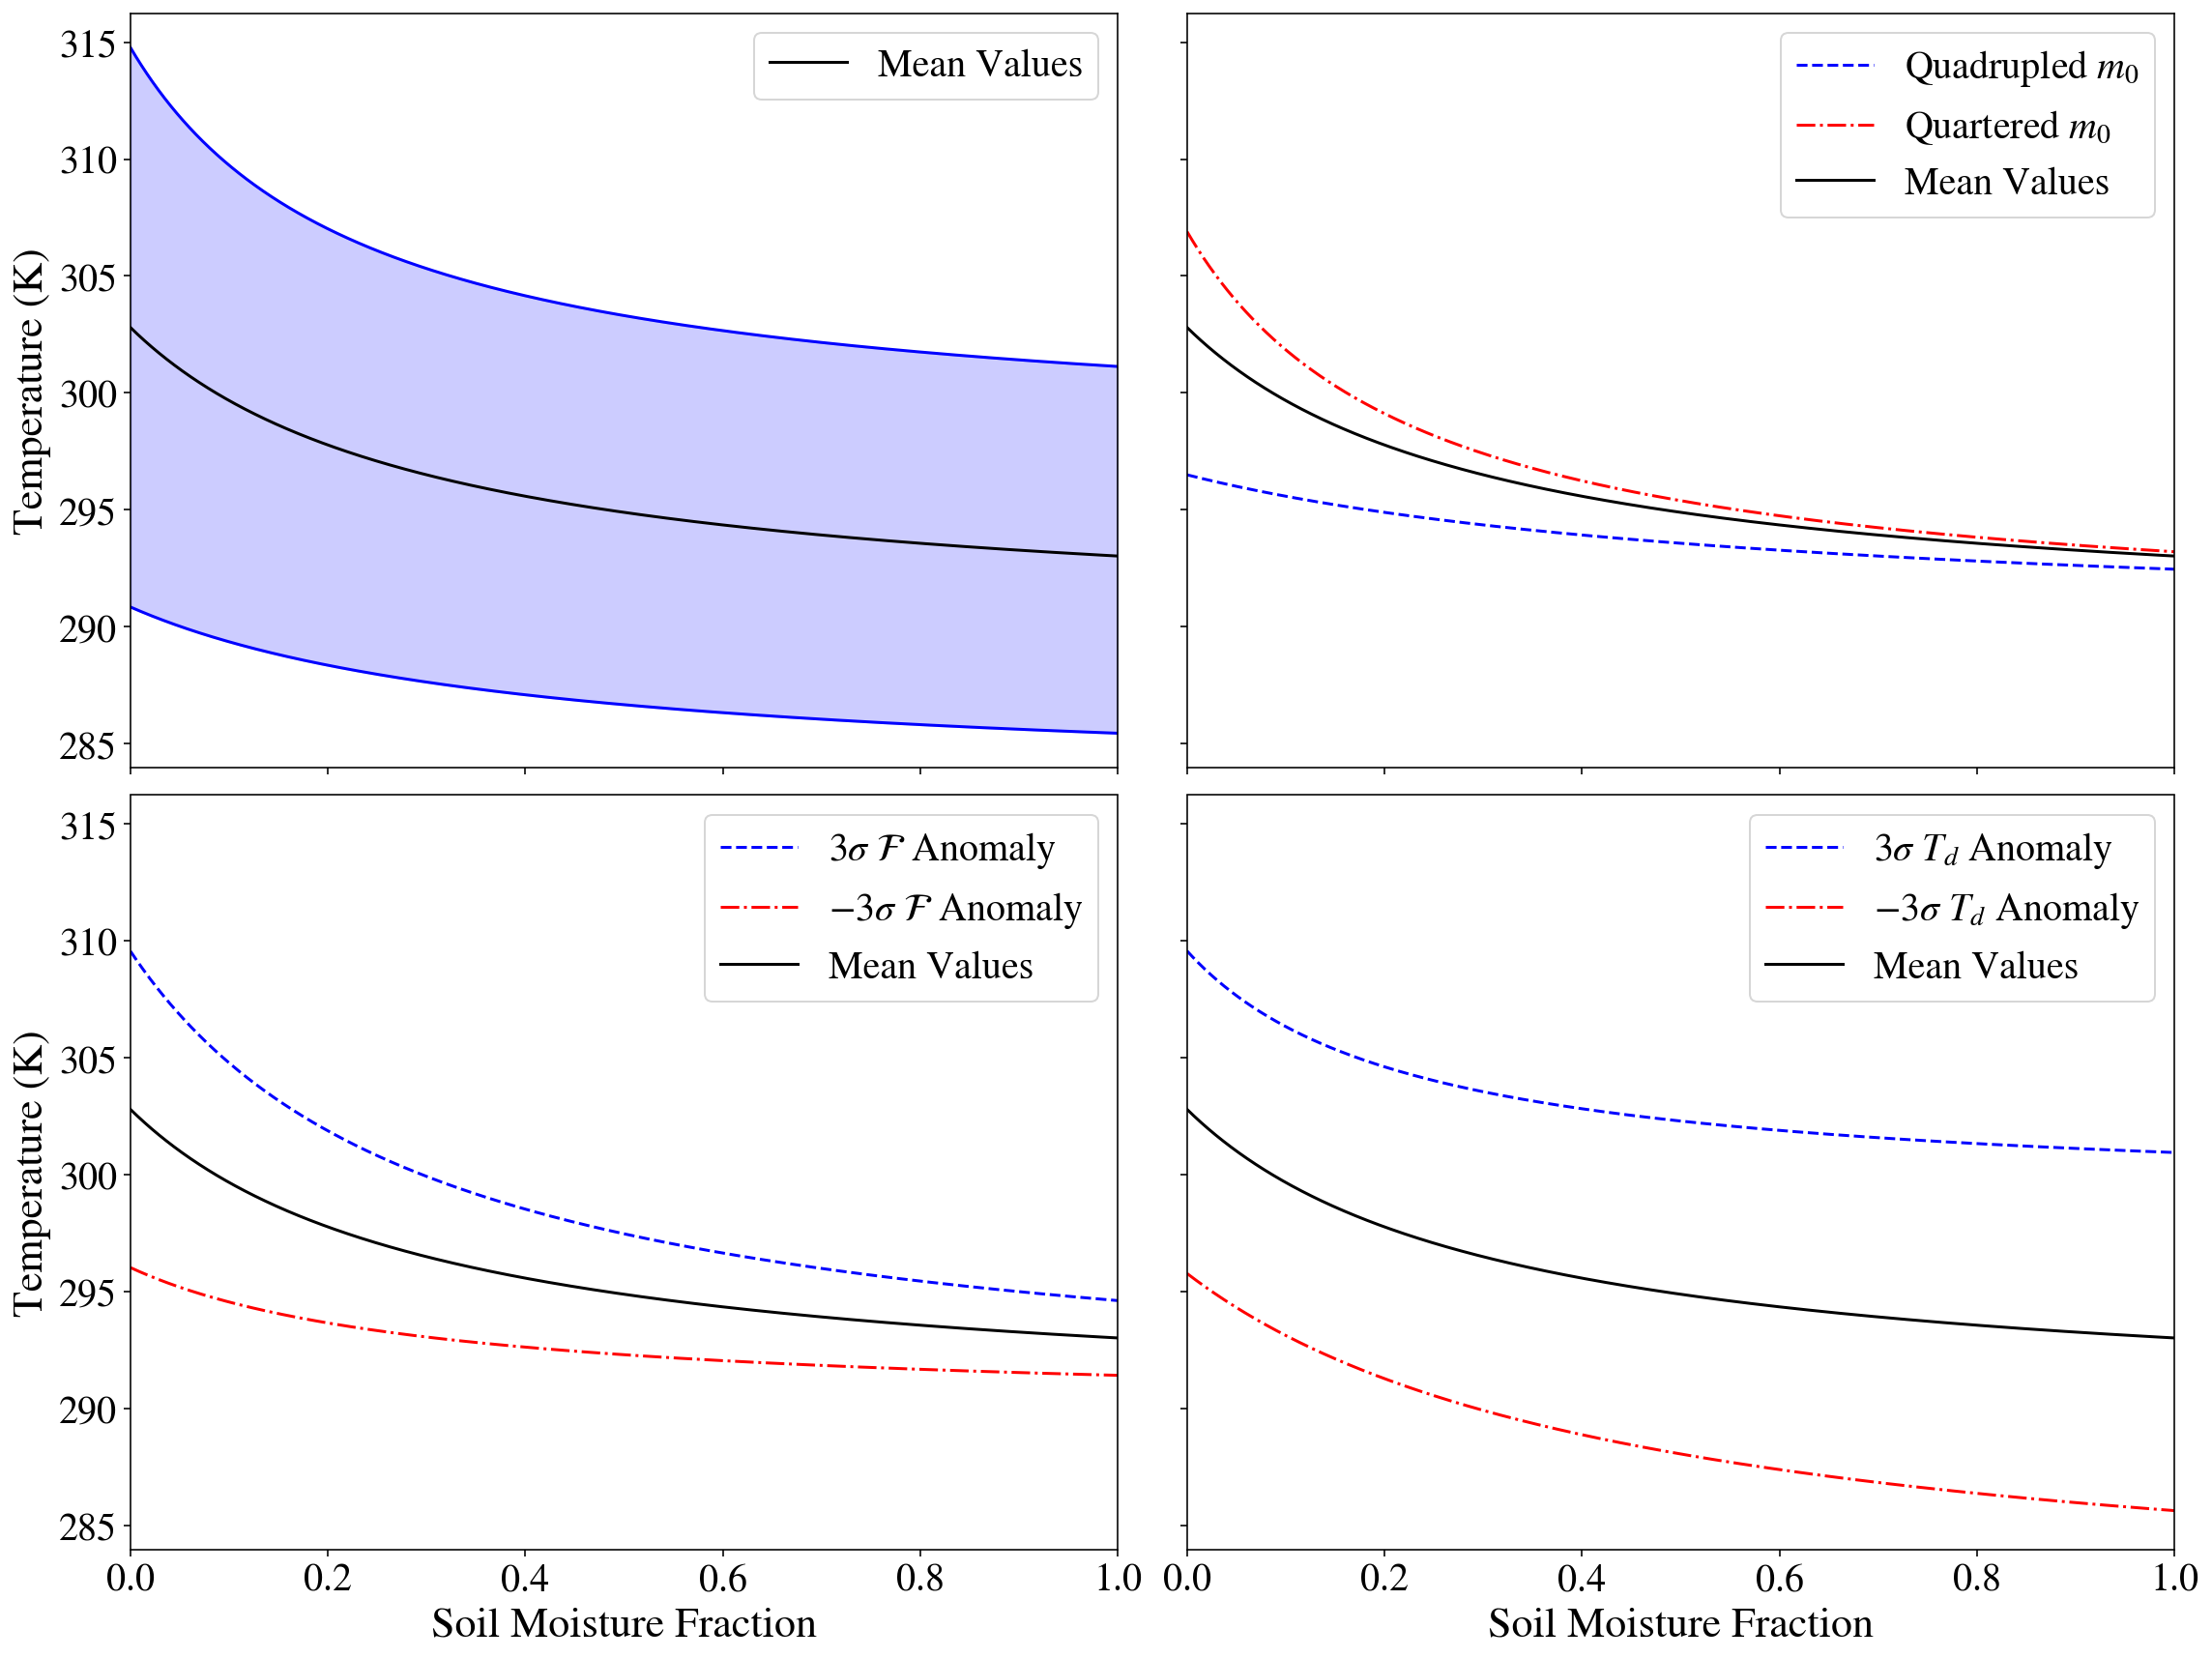

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(16,12), sharex=True, sharey=True)

ax[0,0].fill_between(moisture, lowerT[0], upperT[0], alpha=0.2, color='b')
ax[0,0].plot(moisture, upperT[0], color='b')
ax[0,0].plot(moisture, lowerT[0], color='b')
#for i in range(0, N_samples):
    #ax[0,0].plot(moisture, T_dist[i])


# upper right 
ax[0,1].plot(moisture, T_null_quadm0, color='b', linestyle="dashed", label='Quadrupled $m_0$')
ax[0,1].plot(moisture, T_null_quarterm0, color='r', linestyle="dashdot", label='Quartered $m_0$')

# lower left
ax[1,0].plot(moisture, T_null_3siguF, color='b', linestyle='dashed', label="$3\sigma$ $\mathcal{F}$ Anomaly")
ax[1,0].plot(moisture, T_null_3siglF, color='r', linestyle='dashdot', label="$-3\sigma$ $\mathcal{F}$ Anomaly")

# lower right
ax[1,1].plot(moisture, T_null_3siguT_d, color='b', linestyle='dashed', label="$3\sigma$ $T_d$ Anomaly")
ax[1,1].plot(moisture, T_null_3siglT_d, color='r', linestyle='dashdot', label="$-3\sigma$ $T_d}$ Anomaly")

for i in range(0,2):
    for j in range(0,2):
        ax[i,j].plot(moisture, T_null_mean, color='k', linestyle='solid', label="Mean Values")
        if j ==0:
            ax[i,j].set_ylabel("Temperature (K)", fontsize=22)
        if i == 1:
            ax[i,j].set_xlabel("Soil Moisture Fraction", fontsize=22)
        
        ax[i,j].tick_params(axis='both', labelsize=20)
        ax[i,j].legend(fontsize=20)
        ax[i,j].set_xlim((0,1))
        
fig.tight_layout()
        

#fig.savefig("./figures/1_3_2021_NullclineVariationsGammaCorrect.png", dpi=400)
#fig.savefig("../docs/figdump/1_3_2021_NullclineVariationsGammaCorrect.png", dpi=400)

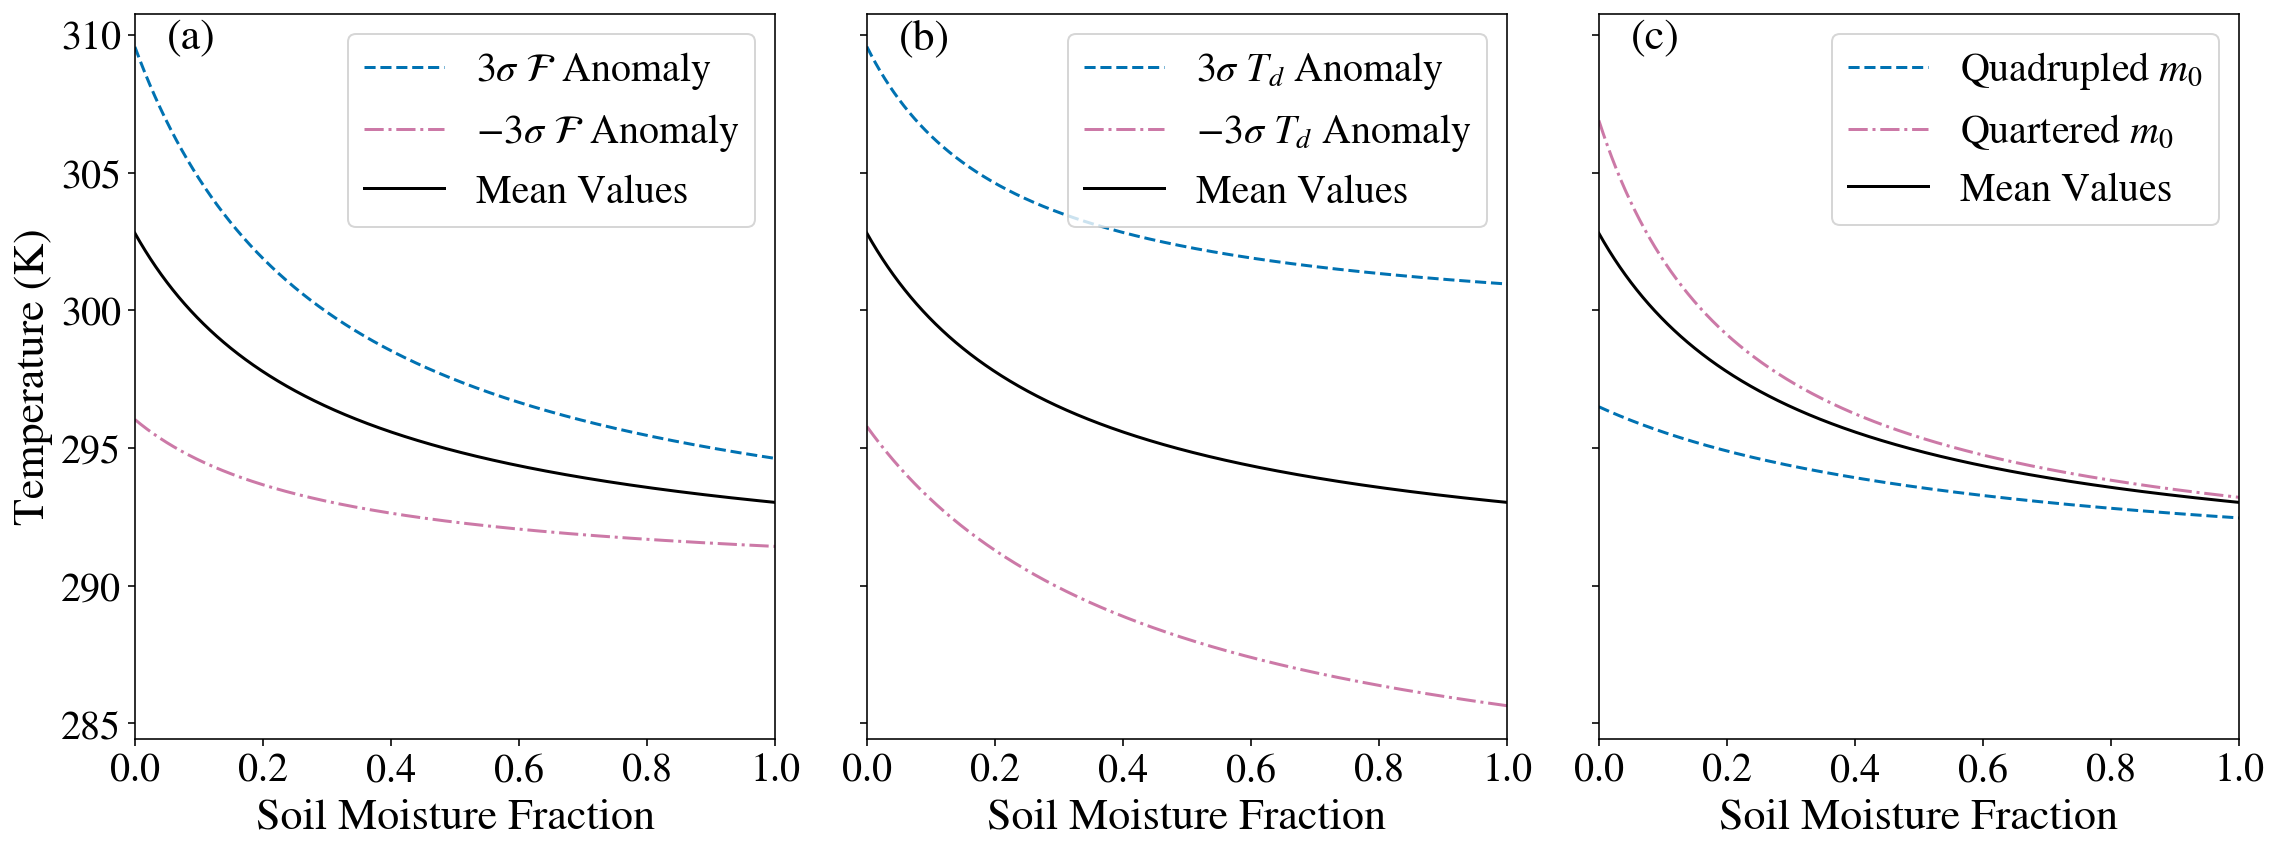

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(16,6), sharey=True)
labels = ["(a)", "(b)", "(c)"]

# upper right 
ax[2].plot(moisture, T_null_quadm0, color='#0072B2', linestyle="dashed", label='Quadrupled $m_0$')
ax[2].plot(moisture, T_null_quarterm0, color='#CC79A7', linestyle="dashdot", label='Quartered $m_0$')

# lower left
ax[0].plot(moisture, T_null_3siguF, color='#0072B2', linestyle='dashed', label="$3\sigma$ $\mathcal{F}$ Anomaly")
ax[0].plot(moisture, T_null_3siglF, color='#CC79A7', linestyle='dashdot', label="$-3\sigma$ $\mathcal{F}$ Anomaly")

# lower right
ax[1].plot(moisture, T_null_3siguT_d, color='#0072B2', linestyle='dashed', label="$3\sigma$ $T_d$ Anomaly")
ax[1].plot(moisture, T_null_3siglT_d, color='#CC79A7', linestyle='dashdot', label="$-3\sigma$ $T_d}$ Anomaly")

for i in range(0,3):
    ax[i].plot(moisture, T_null_mean, color='k', linestyle='solid', label="Mean Values")
    if i == 0:
        ax[i].set_ylabel("Temperature (K)", fontsize=22)
    ax[i].set_xlabel("Soil Moisture Fraction", fontsize=22)

    ax[i].tick_params(axis='both', labelsize=20)
    ax[i].legend(fontsize=20)
    ax[i].set_xlim((0,1))
    ax[i].text(0.05, 309.5, labels[i], fontsize=22)
        
fig.tight_layout()
        

fig.savefig("./figures/1_19_2021_NullclineVariationsGammaCorrect.png", dpi=400)
fig.savefig("../docs/figdump/1_19_2021_NullclineVariationsGammaCorrect.png", dpi=400)

In [7]:
deriv_T = - F * gamma * nu * L * (alpha_s + alpha_r + L * gamma * nu * (moisture + m0))**(-2)

In [8]:
N_samples = 10**4
F_dist = np.random.normal(F, F_std, N_samples)
T_d_dist = np.random.normal(T_d, T_d_std, N_samples)

P_surf = 101325 # Pa
R_w = 461.52 #J/kg
T_0 = 273.15 # K

prefactor_model = 0.622 * L * (P_surf * R_w * T_d**2)**(-1) * 611
exp_term_model = np.exp(L * R_w**(-1) * (T_0**(-1) - T_d**(-1) ))
gamma = prefactor_model * exp_term_model

prefactor_dist = 0.622 * L * (P_surf * R_w * T_d_dist**2)**(-1) * 611
exp_term_dist = np.exp(L * R_w**(-1) * (T_0**(-1) - T_d_dist**(-1) ))

gamma_dist = prefactor_dist * exp_term_dist

dT_dist = - F_dist[:, None] * gamma_dist[:, None] * nu * L * (alpha_s + alpha_r + L * gamma_dist[:, None] * nu * (moisture + m0))**(-2)

maxdT = np.max(dT_dist[:,0])
lowdT = np.min(dT_dist[:,0])
maxindex1 = np.where(dT_dist[:,0] == maxdT)[0]
lowindex1 = np.where(dT_dist[:,0] == lowdT)[0]
upperdT = dT_dist[maxindex1,:]
lowerdT = dT_dist[lowindex1,:]
lowT

290.84342504602205

In [9]:
F_3sigu = F + 3 * F_std
F_3sigd = F - 3 * F_std 

deriv_T_F3sigu = - F_3sigu * gamma * nu * L * (alpha_s + alpha_r + L * gamma * nu * (moisture + m0))**(-2)
deriv_T_F3sigd = - F_3sigd * gamma * nu * L * (alpha_s + alpha_r + L * gamma * nu * (moisture + m0))**(-2)

T_d3sigu = T_d + 3 * T_d_std 
sig3u_prefactor = 0.622 * L * (P_surf * R_w * T_d3sigu**2)**(-1) * 611
sig3u_exp_term = np.exp(L * R_w**(-1) * (T_0**(-1) - T_d3sigu**(-1) ))
gamma_sig3u = sig3u_prefactor * sig3u_exp_term

T_d3sigl = T_d - 3 * T_d_std 
sig3dl_prefactor = 0.622 * L * (P_surf * R_w * T_d3sigl**2)**(-1) * 611
sig3dl_exp_term = np.exp(L * R_w**(-1) * (T_0**(-1) - T_d3sigl**(-1) ))
gamma_sig3dl = sig3dl_prefactor * sig3dl_exp_term

deriv_T_Td3sigu = - F * gamma_sig3u * nu * L * (alpha_s + alpha_r + L * gamma_sig3u * nu * (moisture + m0))**(-2)
deriv_T_Td3sigd = - F * gamma_sig3dl * nu * L * (alpha_s + alpha_r + L * gamma_sig3dl * nu * (moisture + m0))**(-2)

deriv_T_m04 = - F * gamma * nu * L * (alpha_s + alpha_r + L * gamma * nu * (moisture + 4 * m0))**(-2)
deriv_T_m025 = - F * gamma * nu * L * (alpha_s + alpha_r + L * gamma * nu * (moisture + 0.25 * m0))**(-2)

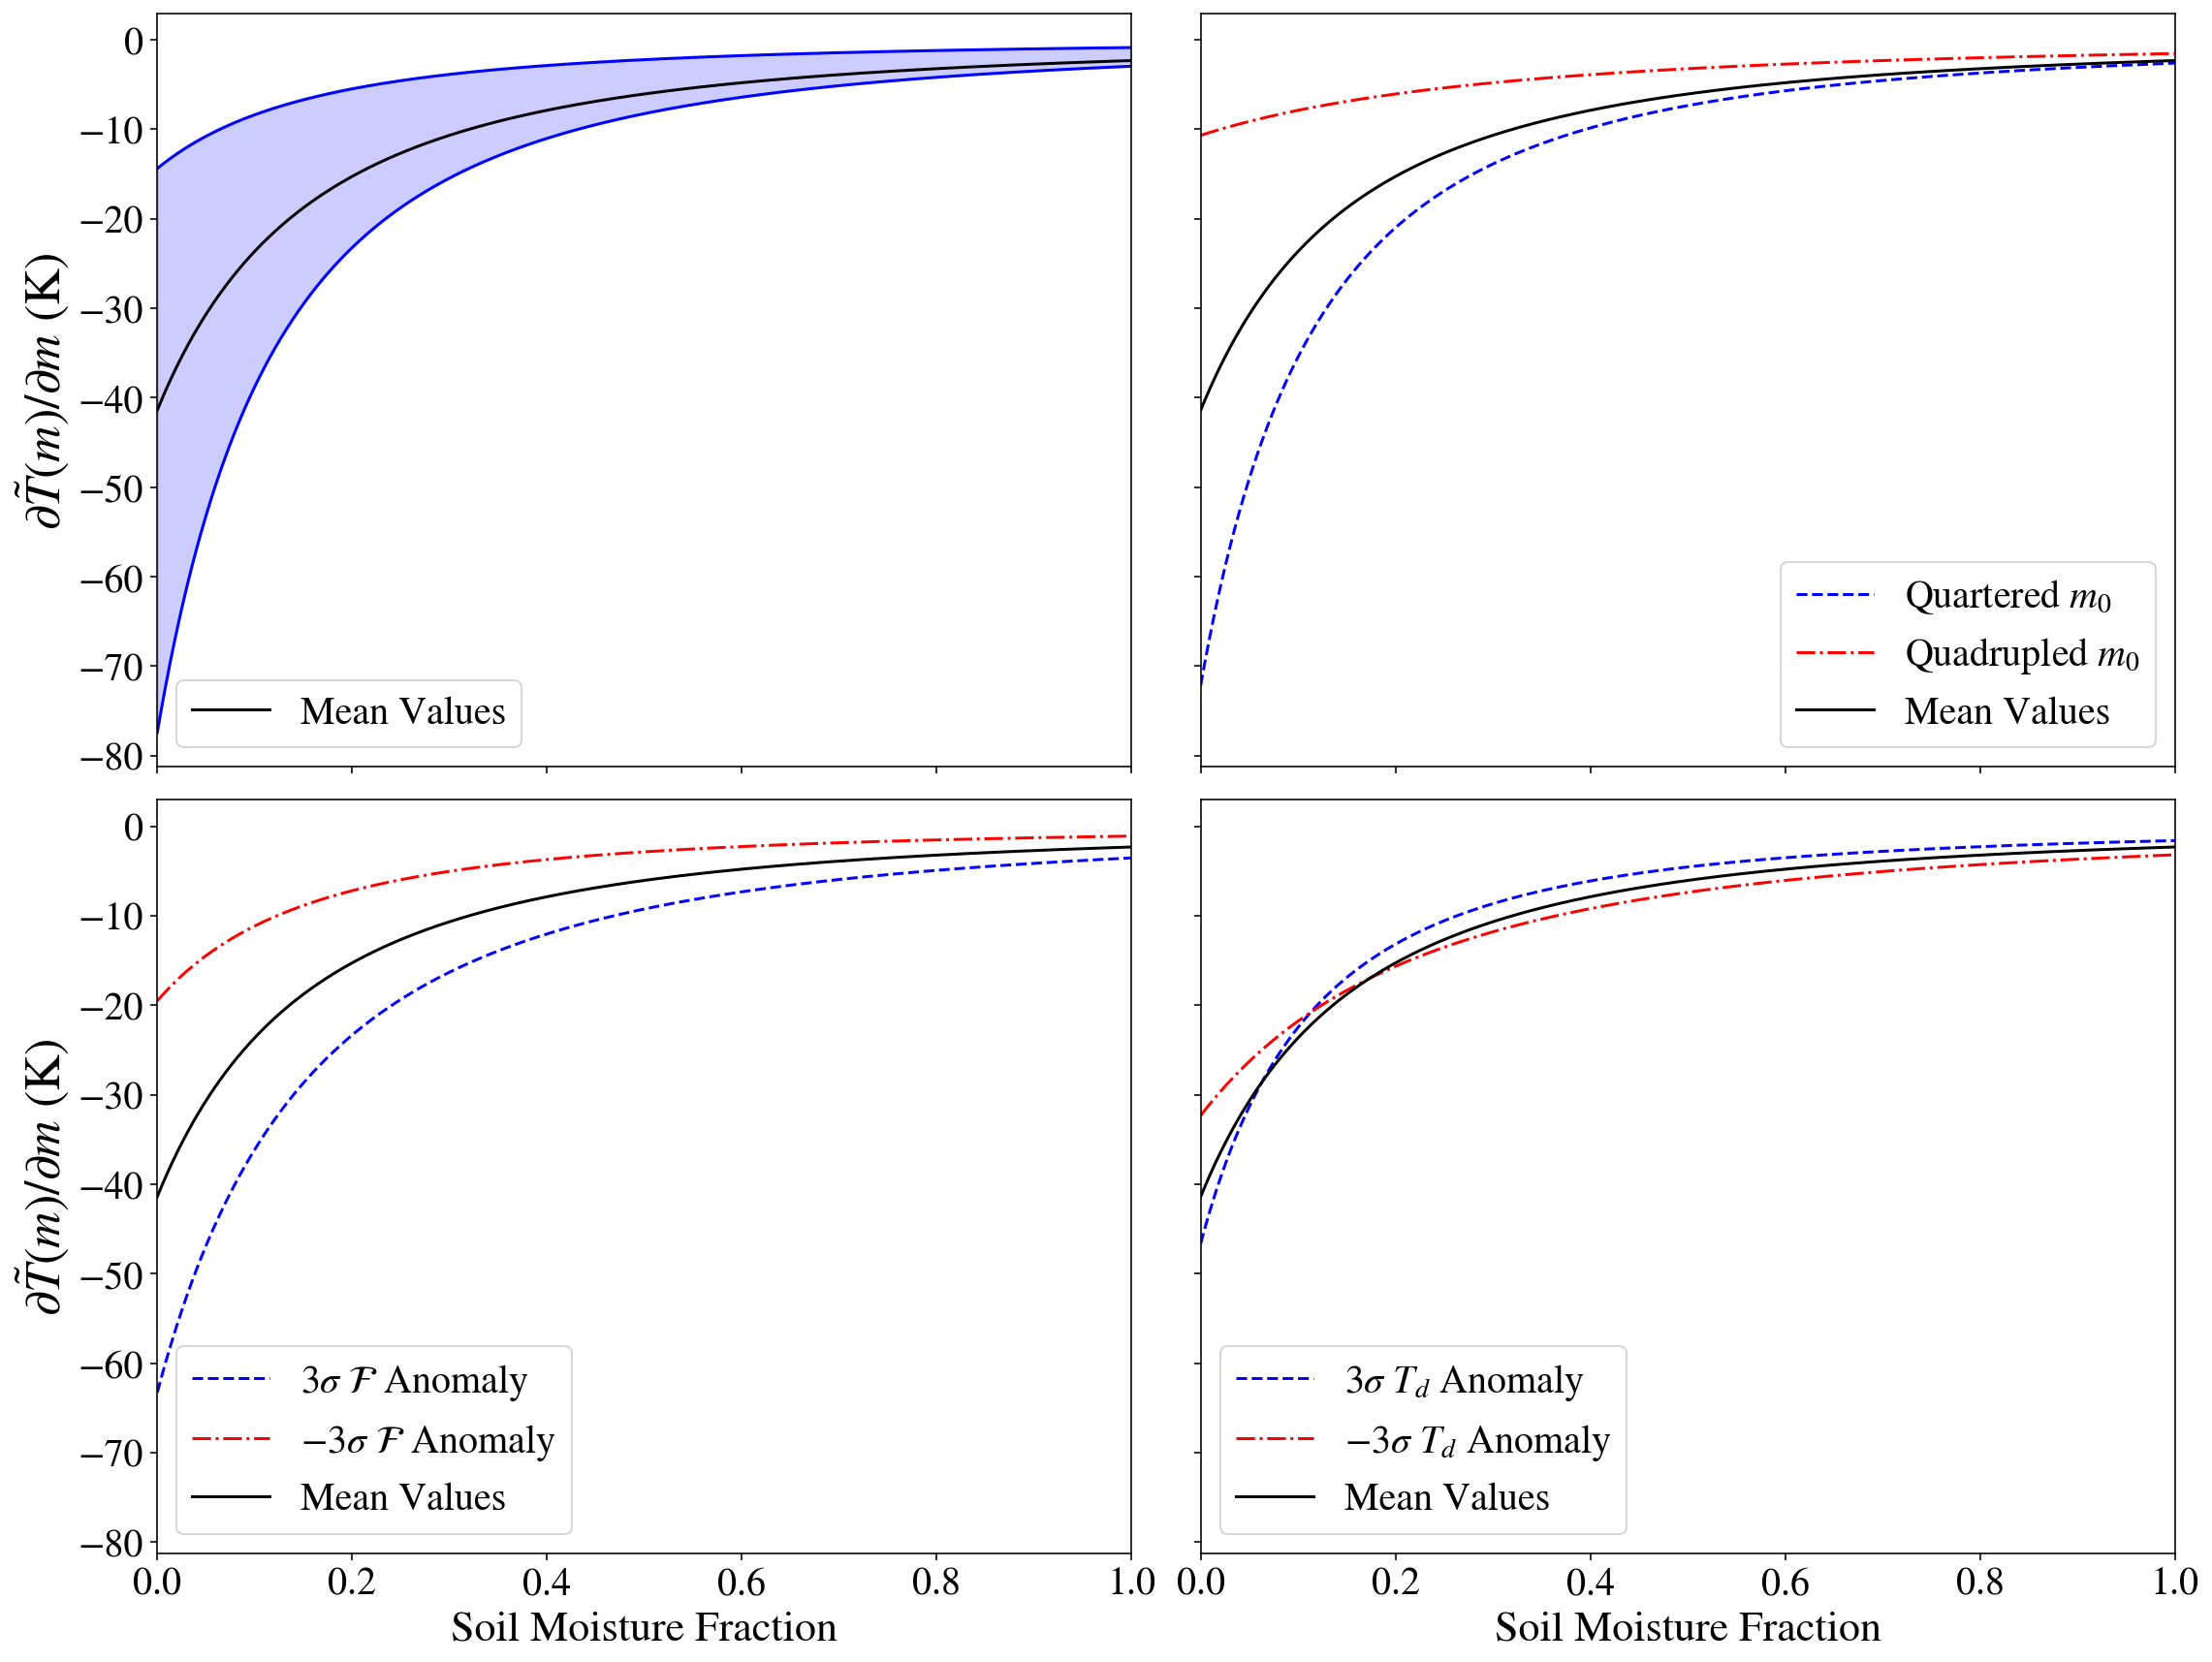

In [10]:
fig, ax = plt.subplots(2,2, figsize=(16,12),sharex=True, sharey=True)

ax[0,0].fill_between(moisture, lowerdT[0], upperdT[0], alpha=0.2, color='b')
ax[0,0].plot(moisture, upperdT[0], color='b')
ax[0,0].plot(moisture, lowerdT[0], color='b')
#for i in range(0, N_samples):
    #ax[0,0].plot(moisture, dT_dist[i,:])

ax[0,1].plot(moisture, deriv_T_m025, color='b', linestyle="dashed", label="Quartered $m_0$")
ax[0,1].plot(moisture, deriv_T_m04, color='r', linestyle="dashdot", label="Quadrupled $m_0$")

# lower left
ax[1,0].plot(moisture, deriv_T_F3sigu, color='b', linestyle='dashed', label="$3\sigma$ $\mathcal{F}$ Anomaly")
ax[1,0].plot(moisture, deriv_T_F3sigd, color='r', linestyle='dashdot', label="$-3\sigma$ $\mathcal{F}$ Anomaly")

# lower right
ax[1,1].plot(moisture, deriv_T_Td3sigu, color='b', linestyle='dashed', label="$3\sigma$ $T_d$ Anomaly")
ax[1,1].plot(moisture, deriv_T_Td3sigd, color='r', linestyle='dashdot', label="$-3\sigma$ $T_d}$ Anomaly")


for i in range(0,2):
    for j in range(0,2):
        ax[i,j].plot(moisture, deriv_T, color='k', linestyle='solid', label="Mean Values")
        if j ==0:
            ax[i,j].set_ylabel(r"$\partial\tilde{T}(m)/\partial m$ (K)", fontsize=26)
        if i == 1:
            ax[i,j].set_xlabel("Soil Moisture Fraction", fontsize=22)
        
        ax[i,j].tick_params(axis='both', labelsize=20)
        ax[i,j].legend(fontsize=20)
        ax[i,j].set_xlim((0,1))
        
fig.tight_layout()

In [11]:
alpha_t = alpha_r + alpha_s + L * gamma * nu * m0
alpha_t

17.735212924397416

In [12]:
TXF = T_d + (F + 3 * F_std) * alpha_t**(-1)
TXF

309.56559537679135

In [13]:
sat_dev_F = ((TXF - T_d) * (alpha_t + L * nu * gamma) - F) * F_std**(-1)
sat_dev_F

31.053213869626035

In [14]:
TXT = T_d + 3 * T_d_std + F / alpha_t
TXT

311.79939524648887

In [15]:
sat_dev_Td = (3 * T_d_std + F * alpha_t**(-1) - F * (alpha_t + gamma * L * nu)**(-1) ) * T_d_std**(-1)
sat_dev_Td

6.258749740514608